In [2]:
# ! git init .
# ! git remote add origin https://github.com/multifacs/transport-problem-new
# ! git pull origin main
# ! pip install memory_profiler

In [3]:
from misc import test_time_mem
from misc import generate_random_transport_problem
from misc import round_to
from misc import timeout
import copy
from tp_potential import Data

import matplotlib.pyplot as plt

from simplex import simplex_method
from northwest import northwest_corner_method
from least import least_cost_cell_method
from vogel import vogels_approximation_method
from tp_potential import solve as potential_method

size = 5
min_cost = 1
max_cost = 10
min_supply = 10
max_supply = 40
min_demand = 5
max_demand = 30

In [4]:
ROUND_N = 3

@timeout(2)
def run_tests(n_loops: int, func, data: Data, method: str = "simplex"):
    global_res = dict(cost=0, time=0, memory=0)
    for _ in range(n_loops):
        res = test_time_mem(func, data, method)
        global_res["cost"] += res["cost"]
        global_res["time"] += res["time"]
        global_res["memory"] += res["memory"]

    global_res["cost"] /= n_loops
    global_res["time"] /= n_loops
    global_res["memory"] /= n_loops

    global_res["cost"] = round_to(global_res["cost"], ROUND_N)
    global_res["time"] = round_to(global_res["time"], ROUND_N)
    global_res["memory"] = round_to(global_res["memory"], ROUND_N)

    return global_res

In [5]:
def run_all(start, end, n_tests, n_loops):
    results = dict(
        x=[], highs=[], simplex=[], northwest=[], least=[], vogel=[], potential=[]
    )
    
    funcs = [potential_method, vogels_approximation_method, simplex_method, simplex_method, northwest_corner_method, least_cost_cell_method]
    methods = ["potential", "vogel", "simplex", "highs", "northwest", "least"]

    for size in range(start, end + 1):
        for test in range(n_tests):
            cost_matrix, supply, demand = generate_random_transport_problem(
                size,
                size,
                min_cost,
                max_cost,
                min_supply,
                max_supply,
                min_demand,
                max_demand,
            )
            
            data = Data(
                supply.copy(),
                demand.copy(),
                copy.deepcopy(cost_matrix),
            )
            
            run_results = dict(
                highs=None, simplex=None, northwest=None, least=None, vogel=None, potential=None
            )
            
            test_failed_flag = False
            for f, m in zip(funcs, methods):
                try:
                    run_results[m] = run_tests(
                        n_loops,
                        f,
                        copy.deepcopy(data),
                        m,
                    )
                except Exception as e:
                    print(e)
                    test_failed_flag = True
                    break
            
            if test_failed_flag:
                continue
            for m in methods:
                results[m].append(run_results[m])

            results["x"].append(size)
    print(results["x"])
    return results

In [6]:
def plot_all(results, verbose=False, xlabel="Размер матрицы n x n"):
    x = results["x"]
    
    methods = ["highs", "simplex", "northwest", "least", "vogel", "potential"]
    colors = ["#0006", "#0FF20F66", "#F2AA0F66", "#0F5EF266", "#F20F8066", "#5B729E66"]

    # Create a figure and subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))

    for method, color in zip(methods, colors):
        # Plot on the first subplot
        ax1.plot(
            x,
            [x["cost"] for x in results[method]],
            color=color,
            label=method,
            marker=".",
            linestyle="dotted",
        )

        # Plot on the second subplot
        ax2.plot(
            x,
            [x["time"] for x in results[method]],
            color=color,
            label=method,
            marker=".",
            linestyle="dotted",
        )

        # Plot on the second subplot
        ax3.plot(
            x,
            [x["memory"] for x in results[method]],
            color=color,
            label=method,
            marker=".",
            linestyle="dotted",
        )

    ax1.set_title("Решения")
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel("Ответ")
    ax1.legend()

    ax2.set_title("Время")
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel("Время, сек.")
    ax2.legend()

    ax3.set_title("Память")
    ax3.set_xlabel(xlabel)
    ax3.set_ylabel("Память, кб")
    ax3.legend()

    # Adjust the spacing between subplots
    # plt.tight_layout()

    # Display the plot
    plt.show()
    
    if verbose:
        for method, color in zip(methods, colors):
            # Create a figure and subplots
            fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
            # Plot on the first subplot
            ax1.plot(
                x,
                [x["cost"] for x in results[method]],
                color=color,
                label=method,
                marker=".",
                linestyle="dotted",
            )
    
            # Plot on the second subplot
            ax2.plot(
                x,
                [x["time"] for x in results[method]],
                color=color,
                label=method,
                marker=".",
                linestyle="dotted",
            )
    
            # Plot on the second subplot
            ax3.plot(
                x,
                [x["memory"] for x in results[method]],
                color=color,
                label=method,
                marker=".",
                linestyle="dotted",
            )
    
            ax1.set_title("Решения")
            ax1.set_xlabel(xlabel)
            ax1.set_ylabel("Ответ")
            ax1.legend()
        
            ax2.set_title("Время")
            ax2.set_xlabel(xlabel)
            ax2.set_ylabel("Время, сек.")
            ax2.legend()
        
            ax3.set_title("Память")
            ax3.set_xlabel(xlabel)
            ax3.set_ylabel("Память, кб")
            ax3.legend()
        
            # Adjust the spacing between subplots
            # plt.tight_layout()
        
            # Display the plot
            plt.show()

In [7]:
def scatter_all(results, verbose = False, xlabel="Размер матрицы n x n"):
    x = results["x"]
    
    methods = ["highs", "simplex", "northwest", "least", "vogel", "potential"]
    colors = ["#0006", "#0FF20F66", "#F2AA0F66", "#0F5EF266", "#F20F8066", "#5B729E66"]

    # Create a figure and subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))

    for method, color in zip(methods, colors):
        # Plot on the first subplot
        ax1.scatter(
            x,
            [x["cost"] for x in results[method]],
            color=color,
            label=method,
            marker=".",
        )

        # Plot on the second subplot
        ax2.scatter(
            x,
            [x["time"] for x in results[method]],
            color=color,
            label=method,
            marker=".",
        )

        # Plot on the second subplot
        ax3.scatter(
            x,
            [x["memory"] for x in results[method]],
            color=color,
            label=method,
            marker=".",
        )

    ax1.set_title("Решения")
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel("Ответ")
    ax1.legend()

    ax2.set_title("Время")
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel("Время, сек.")
    ax2.legend()

    ax3.set_title("Память")
    ax3.set_xlabel(xlabel)
    ax3.set_ylabel("Память, кб")
    ax3.legend()

    # Adjust the spacing between subplots
    # plt.tight_layout()

    # Display the plot
    plt.show()
    
    if verbose:
        for method, color in zip(methods, colors):
            # Create a figure and subplots
            fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
            # Plot on the first subplot
            ax1.scatter(
                x,
                [x["cost"] for x in results[method]],
                color=color,
                label=method,
                marker=".",
            )
    
            # Plot on the second subplot
            ax2.scatter(
                x,
                [x["time"] for x in results[method]],
                color=color,
                label=method,
                marker=".",
            )
    
            # Plot on the second subplot
            ax3.scatter(
                x,
                [x["memory"] for x in results[method]],
                color=color,
                label=method,
                marker=".",
            )
    
            ax1.set_title("Решения")
            ax1.set_xlabel(xlabel)
            ax1.set_ylabel("Ответ")
            ax1.legend()
        
            ax2.set_title("Время")
            ax2.set_xlabel(xlabel)
            ax2.set_ylabel("Время, сек.")
            ax2.legend()
        
            ax3.set_title("Память")
            ax3.set_xlabel(xlabel)
            ax3.set_ylabel("Память, кб")
            ax3.legend()
        
            # Adjust the spacing between subplots
            # plt.tight_layout()
        
            # Display the plot
            plt.show()

In [6]:
SIZE_START = 3
SIZE_END = 10
TESTS = 1
LOOPS = 3

results = run_all(SIZE_START, SIZE_END, TESTS, LOOPS)

C:\Users\Nick\Documents\Programming\Python\transport-problem-new\simplex.py:39: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  res = linprog(c, A_eq=A_eq, b_eq=b_eq, method=method)


function [solve] timeout [1 seconds] exceeded!
[3, 4, 5, 6, 8, 9, 10]


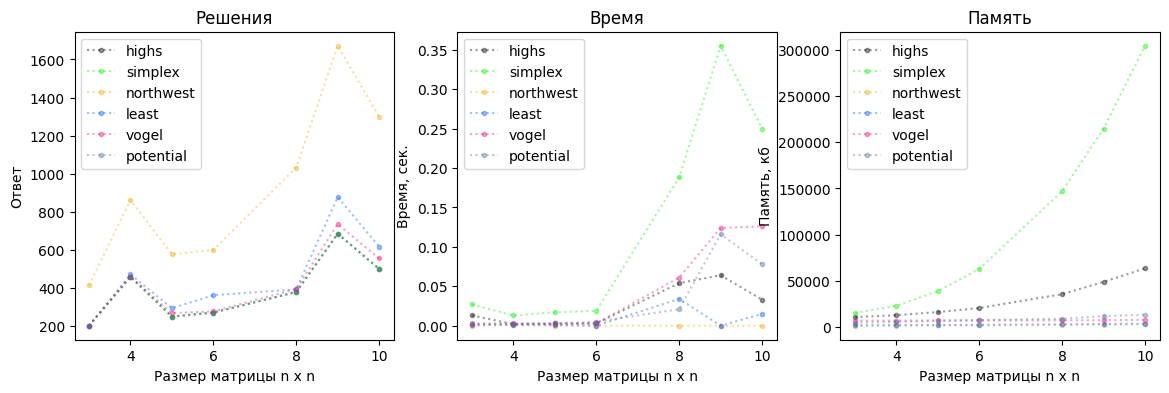

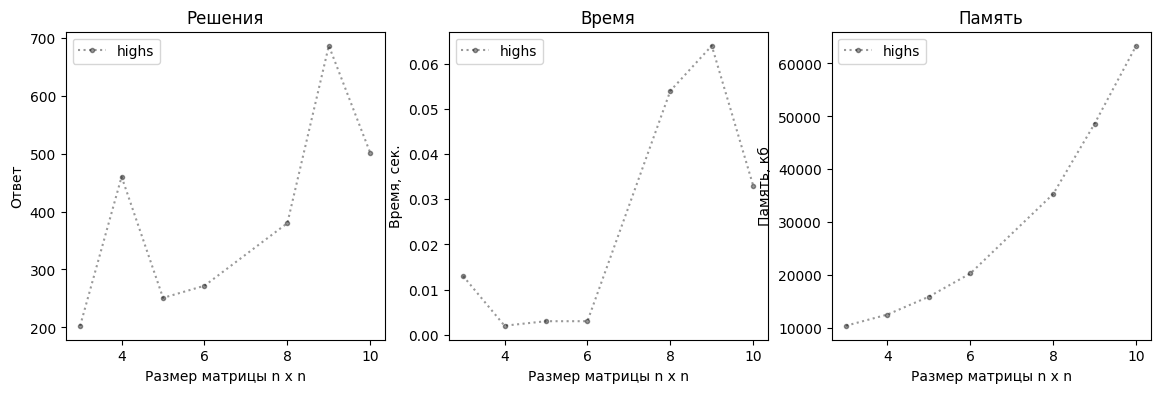

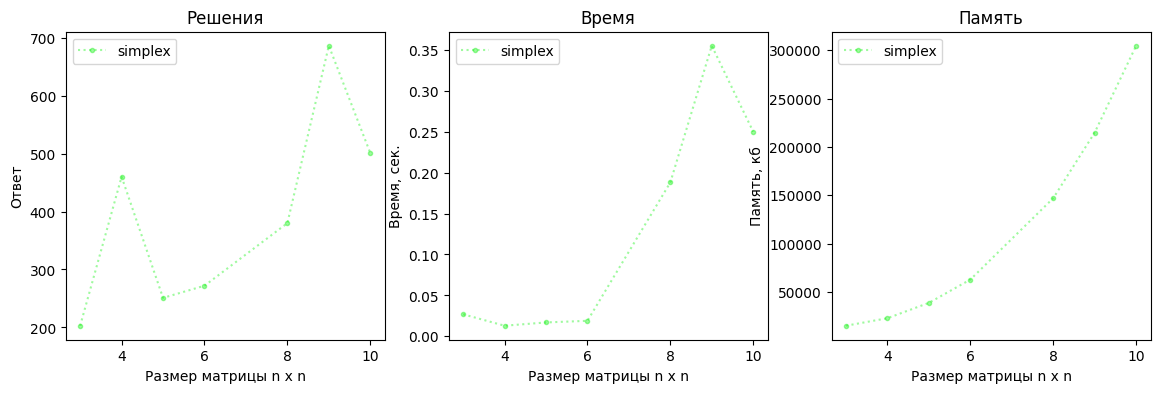

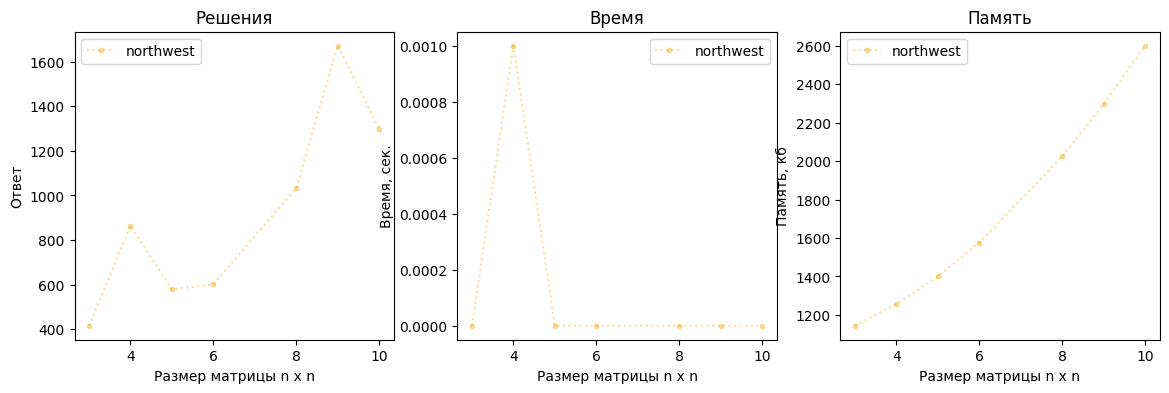

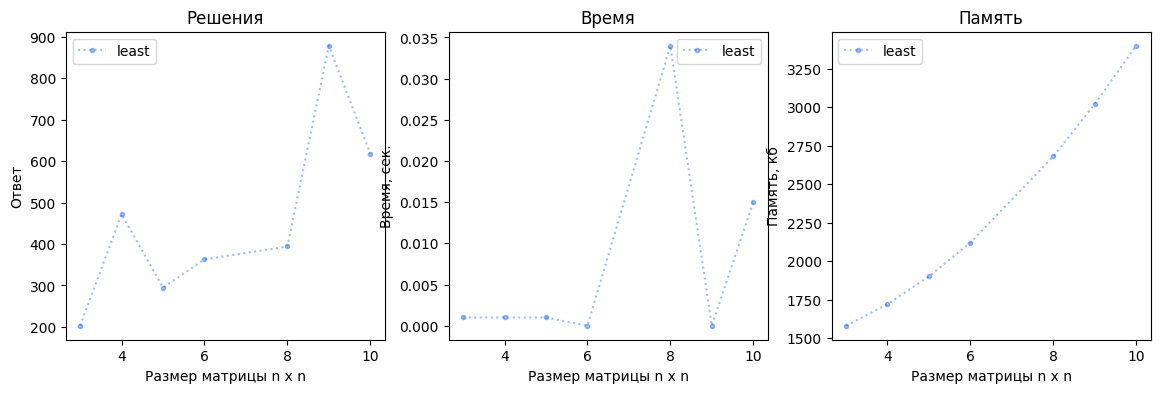

In [ ]:
plot_all(results)

In [15]:
SIZE_START = 3
SIZE_END = 10
TESTS = 3
LOOPS = 1

results = run_all(SIZE_START, SIZE_END, TESTS, LOOPS)

C:\Users\Nick\Documents\Programming\Python\transport-problem-new\simplex.py:39: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  res = linprog(c, A_eq=A_eq, b_eq=b_eq, method=method)


function [solve] timeout [1 seconds] exceeded!
function [solve] timeout [1 seconds] exceeded!
function [solve] timeout [1 seconds] exceeded!
function [vogels_approximation_method] timeout [1 seconds] exceeded!
function [vogels_approximation_method] timeout [1 seconds] exceeded!
function [solve] timeout [1 seconds] exceeded!
function [vogels_approximation_method] timeout [1 seconds] exceeded!
function [vogels_approximation_method] timeout [1 seconds] exceeded!
[3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 8, 8]


In [ ]:
scatter_all(results)

C:\Users\Nick\AppData\Local\Temp\ipykernel_18824\2045542178.py:54: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Nick\Documents\Programming\Python\transport-problem-new\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


In [ ]:
SIZE_START = 3
SIZE_END = 3
TESTS = 20
LOOPS = 1

results = run_all(SIZE_START, SIZE_END, TESTS, LOOPS)
plot_all(results)

In [ ]:
SIZE_START = 7
SIZE_END = 7
TESTS = 20
LOOPS = 1

results = run_all(SIZE_START, SIZE_END, TESTS, LOOPS)
plot_all(results)

In [12]:
def plot_errors(results):
    import sklearn.metrics as met
    from scipy.stats import ttest_ind
    import numpy as np
    import seaborn as sns
    import pandas as pd
    
    methods = ["highs", "simplex", "northwest", "least", "vogel", "potential"]
    
    reference = np.array([x["cost"] for x in results["highs"]])
    
    data = []
    
    for m in methods[1:]:
        vals = np.array([x["cost"] for x in results[m]])
        
        errors = [m]
        mse = met.mean_squared_error(reference, vals)
        errors.append(mse)
        mape = met.mean_absolute_percentage_error(reference, vals)
        errors.append(mape)

        data.append(errors)
        
        # {ttest_ind(reference, vals)}
        print(f"{m}: MAPE = {mape} MSE = {mse}")
    
    df = pd.DataFrame(data, columns=["Method", "MSE", "MAPE"])
    
    print(df)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    # sns.set_theme(style="darkgrid")
    
    ax1.bar(data=df, x="Method", height="MSE")
    ax1.set_ylabel("MSE")
    ax2.bar(data=df, x="Method", height="MAPE")
    ax2.set_ylabel("MAPE")
    
    # Adjust the spacing between subplots
    plt.tight_layout()
    
    # Display the plot
    plt.show()


In [9]:
def plot_dev(results):
    import sklearn.metrics as met
    import numpy as np
    import seaborn as sns
    import pandas as pd
    
    methods = ["highs", "simplex", "northwest", "least", "vogel", "potential"]
    
    reference = np.array([x["cost"] for x in results["highs"]])
    
    data = []
    
    for m in methods[1:]:
        vals = np.array([x["cost"] for x in results[m]])
        dev = vals - reference
        data.append(dev)

    data = np.array(data)
    df = pd.DataFrame(np.transpose(data), columns=methods[1:])
    
    print(df)
    
    sns.set_theme(style="darkgrid")
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
    
    sns.set_theme(style="darkgrid")
    
    sns.histplot(df[["northwest", "least"]], kde=True, ax=ax1)
    sns.histplot(df[["northwest", "vogel"]], kde=True, ax=ax2)
    sns.histplot(df[["least", "vogel"]], kde=True, ax=ax3)
    
    # Adjust the spacing between subplots
    plt.tight_layout()
    
    # Display the plot
    plt.show()
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
    
    # sns.set_theme(style="darkgrid")
    
    sns.histplot(df[["simplex", "vogel"]], kde=True, ax=ax1)
    sns.histplot(df[["least", "potential"]], kde=True, ax=ax2)
    sns.histplot(df[["vogel", "potential"]], kde=True, ax=ax3)
    
    # Adjust the spacing between subplots
    plt.tight_layout()
    
    # Display the plot
    plt.show()

In [10]:
SIZE_START = 3
SIZE_END = 3
TESTS = 50
LOOPS = 1

results = run_all(SIZE_START, SIZE_END, TESTS, LOOPS)
results

C:\Users\Nick\Documents\Programming\Python\transport-problem-new\simplex.py:39: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  res = linprog(c, A_eq=A_eq, b_eq=b_eq, method=method)


function [solve] timeout [1 seconds] exceeded!
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


{'x': [3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3],
 'highs': [{'cost': 238.0, 'time': 0.012, 'memory': 10471.0},
  {'cost': 130.0, 'time': 0.003, 'memory': 10463.0},
  {'cost': 223.0, 'time': 0.002, 'memory': 10455.0},
  {'cost': 267.0, 'time': 0.003, 'memory': 10447.0},
  {'cost': 298.0, 'time': 0.002, 'memory': 10439.0},
  {'cost': 303.0, 'time': 0.006, 'memory': 10431.0},
  {'cost': 301.0, 'time': 0.004, 'memory': 10423.0},
  {'cost': 286.0, 'time': 0.002, 'memory': 10407.0},
  {'cost': 257.0, 'time': 0.002, 'memory': 10399.0},
  {'cost': 371.0, 'time': 0.004, 'memory': 10391.0},
  {'cost': 324.0, 'time': 0.017, 'memory': 10383.0},
  {'cost': 151.0, 'time': 0.077, 'memory': 10375.0},
  {'cost': 235.0, 'time': 0.004, 'memory': 10367.0},
  {'cost': 328.0, 'time': 0.019, 'memory': 10359.0}

simplex: MAPE = 0.0 R2 = 1.0 MSE = 0.0
northwest: MAPE = 0.4284712763075129 R2 = -1.5969395832119142 MSE = 20933.95918367347
least: MAPE = 0.0729606211721129 R2 = 0.8632571422194171 MSE = 1102.2857142857142
vogel: MAPE = 0.010987659266837816 R2 = 0.9944606129596402 MSE = 44.6530612244898
potential: MAPE = 0.0 R2 = 1.0 MSE = 0.0
      Method           MSE      MAPE        R2
0    simplex      0.000000  0.000000  1.000000
1  northwest  20933.959184  0.428471 -1.596940
2      least   1102.285714  0.072961  0.863257
3      vogel     44.653061  0.010988  0.994461
4  potential      0.000000  0.000000  1.000000


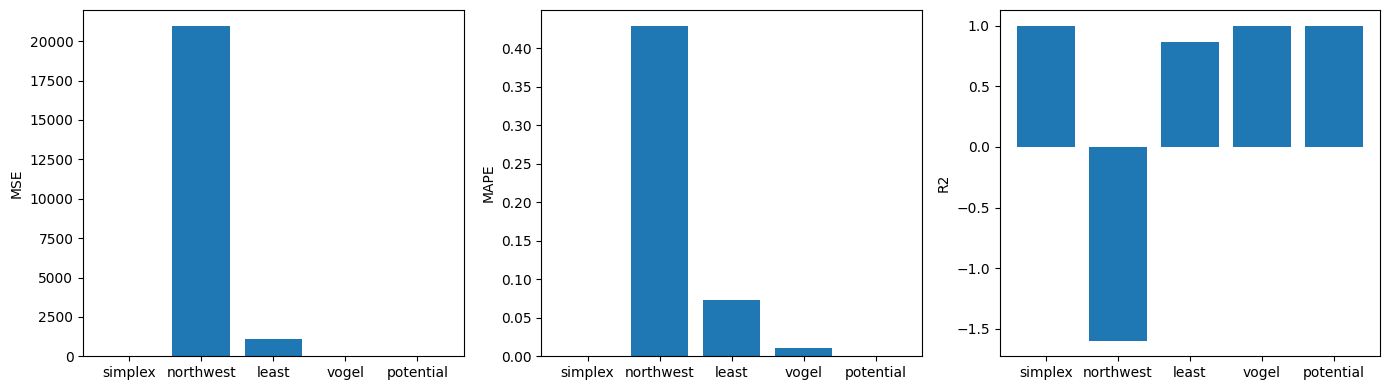

In [11]:
plot_errors(results)

    simplex  northwest  least  vogel  potential
0       0.0        0.0   12.0    0.0        0.0
1       0.0      461.0   10.0    0.0        0.0
2       0.0      192.0    0.0    0.0        0.0
3       0.0        0.0    0.0    0.0        0.0
4       0.0      132.0   30.0   15.0        0.0
5       0.0       69.0    0.0    0.0        0.0
6       0.0      112.0    0.0    0.0        0.0
7       0.0      144.0    0.0    0.0        0.0
8       0.0      100.0    0.0    0.0        0.0
9       0.0        0.0   48.0    0.0        0.0
10      0.0      113.0    0.0    0.0        0.0
11      0.0        3.0    0.0    0.0        0.0
12      0.0       90.0    3.0    0.0        0.0
13      0.0       16.0    0.0    0.0        0.0
14      0.0      119.0    0.0    0.0        0.0
15      0.0       12.0   33.0   33.0        0.0
16      0.0        0.0    0.0    0.0        0.0
17      0.0       60.0   24.0    0.0        0.0
18      0.0      189.0    0.0    0.0        0.0
19      0.0       99.0   20.0    0.0    

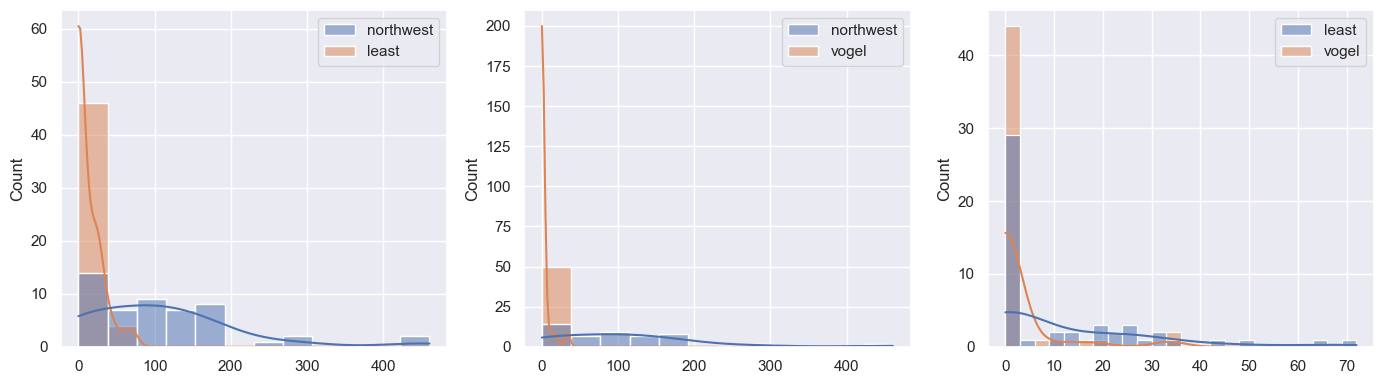

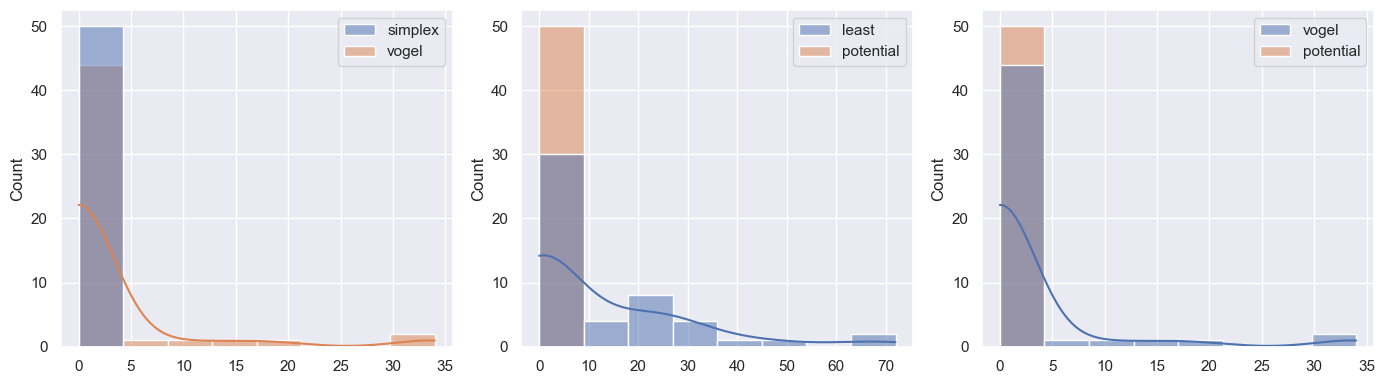

In [64]:
plot_dev(results)

In [67]:
SIZE_START = 10
SIZE_END = 10
TESTS = 50
LOOPS = 1

results = run_all(SIZE_START, SIZE_END, TESTS, LOOPS)
results

function [solve] timeout [1 seconds] exceeded!
function [solve] timeout [1 seconds] exceeded!
function [vogels_approximation_method] timeout [1 seconds] exceeded!
function [vogels_approximation_method] timeout [1 seconds] exceeded!
function [solve] timeout [1 seconds] exceeded!
function [vogels_approximation_method] timeout [1 seconds] exceeded!
function [vogels_approximation_method] timeout [1 seconds] exceeded!
function [vogels_approximation_method] timeout [1 seconds] exceeded!
function [vogels_approximation_method] timeout [1 seconds] exceeded!
function [solve] timeout [1 seconds] exceeded!
function [solve] timeout [1 seconds] exceeded!
function [vogels_approximation_method] timeout [1 seconds] exceeded!
function [vogels_approximation_method] timeout [1 seconds] exceeded!
function [vogels_approximation_method] timeout [1 seconds] exceeded!
function [vogels_approximation_method] timeout [1 seconds] exceeded!
function [vogels_approximation_method] timeout [1 seconds] exceeded!
functi

{'x': [],
 'highs': [],
 'simplex': [],
 'northwest': [],
 'least': [],
 'vogel': [],
 'potential': []}

In [ ]:
plot_errors(results)

In [ ]:
plot_dev(results)